In [345]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Regression Problem
<hr>

## General Method for Regression

1. 일반 선형회귀
2. 릿지 (Ridge) 
3. 라쏘 (Lasso)
4. 엘라스틱 넷
<br>

## Ensemble Learning
1. Voting
2. Bagging <br>
    ex: Random Forest
3. Boosting <br>
    ex: Gradient Boost, XGBoost, LightGBM, AdaBoost
4. Stacking

<hr>

## **적용할 알고리즘**
0. 
<em>Neural Network</em>

1. linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic Net
5. Random Forest Regression


In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

# Data 살펴보기

In [347]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [348]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [349]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [350]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [351]:
#train.info()

# EDA, Feature Engineering

- Remove Outliers
- NULL 채우기

In [352]:
train.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [353]:
train.drop(['Id'], axis=1,inplace=True)
test.drop(['Id'], axis=1, inplace=True)

## 1. target의 skewness 제거하기

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_33/1322954363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

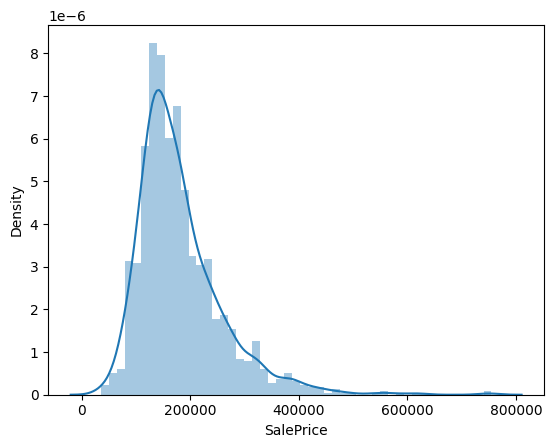

In [354]:
print(train['SalePrice'].describe())
sns.distplot(train['SalePrice'])

In [355]:
train["SalePrice"] = np.log1p(train["SalePrice"])
target = train['SalePrice'].reset_index(drop=True)

/tmp/ipykernel_33/1637237975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["SalePrice"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

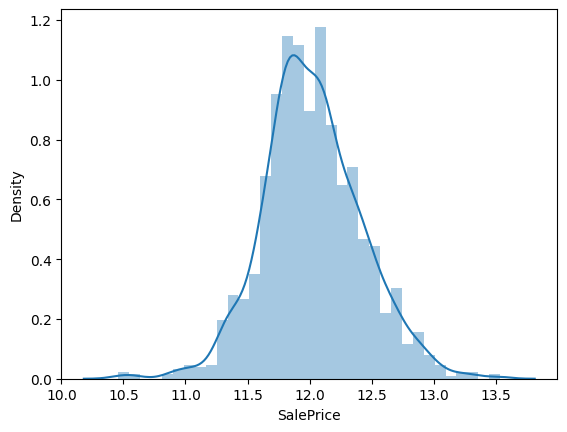

In [356]:
sns.distplot(train["SalePrice"])

## 2. Concat train data & test data

In [357]:
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

In [358]:

df = pd.concat([train_features, test_features]).reset_index(drop=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [359]:
train.shape, test.shape, df.shape

((1460, 80), (1459, 79), (2919, 79))

## 3. 결측치 확인 및 처리

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


<Axes: >

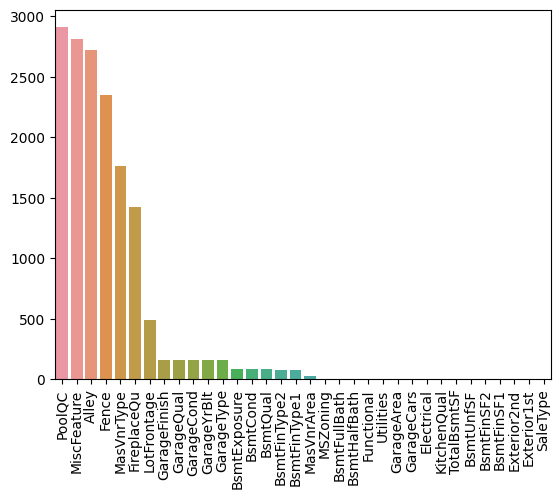

In [360]:
missing = df.isnull().sum()
missing = missing[missing>0]
print(missing)
missing.sort_values(ascending=False, inplace=True)

f, ax = plt.subplots()
plt.xticks(rotation='vertical')
sns.barplot(x=missing.index, y=missing)

In [361]:
print(missing)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [362]:
print(missing.index)
#train[missing.index]

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageFinish', 'GarageQual', 'GarageCond',
       'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'MSZoning',
       'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'GarageArea',
       'GarageCars', 'Electrical', 'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF',
       'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st', 'SaleType'],
      dtype='object')


### Null을 포함하는 특징들은 두가지로 나뉜다.

- Null값이 결측값을 의미하는 feature (주로 숫자형 범주)

    1. LotFrontage
    2. MasVnrArea
    3. Electrical
    ...


- Null값도 의미를 가지는 feature

    - 위 3가지 feature을 제외한 나머지

### Null/None값이 고유한 의미를 가지는 feature

- 'Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'
- 위 경우 Na가 No basement, No garage 등 고유한 의미를 가짐

In [363]:
for col in ('Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'):
    df[col]=df[col].fillna("None")

In [364]:
df['MasVnrArea']=df[df['MasVnrType']=="None"]['MasVnrArea'].fillna(0)

In [365]:
'''index_no_basement= (df['BsmtQual']=="None")
df[index_no_basement]['BsmtFullBath']=df[index_no_basement]['BsmtFullBath'].fillna(0)
df[index_no_basement]['BsmtHalfBath']=df[index_no_basement]['BsmtHalfBath'].fillna(0)'''

'index_no_basement= (df[\'BsmtQual\']=="None")\ndf[index_no_basement][\'BsmtFullBath\']=df[index_no_basement][\'BsmtFullBath\'].fillna(0)\ndf[index_no_basement][\'BsmtHalfBath\']=df[index_no_basement][\'BsmtHalfBath\'].fillna(0)'

### Null값이 결측값을 의미하는 feature (주로 숫자형 범주)

- **하나의 결측값만 갖는 feature들**
- 'GarageArea', 'GarageCars', 'Electrical', 'KitchenQual', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'Exterior1st','SaleType'
- 최빈값으로 채워준다.

In [366]:
for item in missing[missing==1].index:
    df[item] = df[item].fillna(df[item].mode()[0])

- **MSZoning**: Identifies the general zoning classification of the sale.

In [367]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [368]:
df['MSZoning'].isnull().sum()

4

In [369]:
df['MSZoning']= df['MSZoning'].fillna(df['MSZoning'].mode()[0])

- **LotFrontage**: Linear feet of street connected to property
- 동네마다 비슷할 확률이 높으므로 같은 동네의 중앙값으로 결측치를 채워준다.

In [370]:
df.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [371]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- **Utilities**: Type of utilities available

In [372]:
df['Utilities'].isna().sum()

2

In [373]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [374]:
df['Utilities'] = df['Utilities'].fillna('AllPub')

- **MasVnrArea**: Masonry veneer area in square feet 

In [375]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [376]:
# df[df['MasVnrType']=="None"]['MasVnrArea'].fillna(0, inplace=True)

In [377]:
df.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     0.00000
BrkFace    0.00000
None       0.80974
Stone      0.00000
Name: MasVnrArea, dtype: float64

In [378]:
#df['MasVnrArea'] = df.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

- **BsmtFullBath**: Basement full bathrooms

- **BsmtHalfBath**: Basement half bathrooms

In [379]:
for col in ('BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

- **Functional**: Home functionality (Assume typical unless deductions are warranted)
- 지시된 문장에 따라 typical로 지정

In [380]:
df['Functional']=df['Functional'].fillna('Typ')

- **GarageYrBlt**: Year garage was built
- 'YearBuilt'와 상관도가 높으므로 Year Built에 따라 값을 설정하기로 한다.

In [381]:
df['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [382]:
cor=train.corr(numeric_only=True)
cor['GarageYrBlt']['YearBuilt']

0.8256674841743408

In [383]:
train[['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
1455,1999.0,1999
1456,1978.0,1978
1457,1941.0,1941
1458,1950.0,1950


In [384]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['YearBuilt'])

In [385]:
df.isnull().sum().sum()

0

## 4. 숫자형 to 범주형

In [386]:
#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond
df['OverallCond'] = df['OverallCond'].astype(str)
#YrSold,MoSold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

## 5. 상관관계 파악

In [387]:
cor=train.corr(numeric_only=True)

In [388]:
cor_most = cor.index[abs(cor['SalePrice']) >= 0.3]
cor_most

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<Axes: >

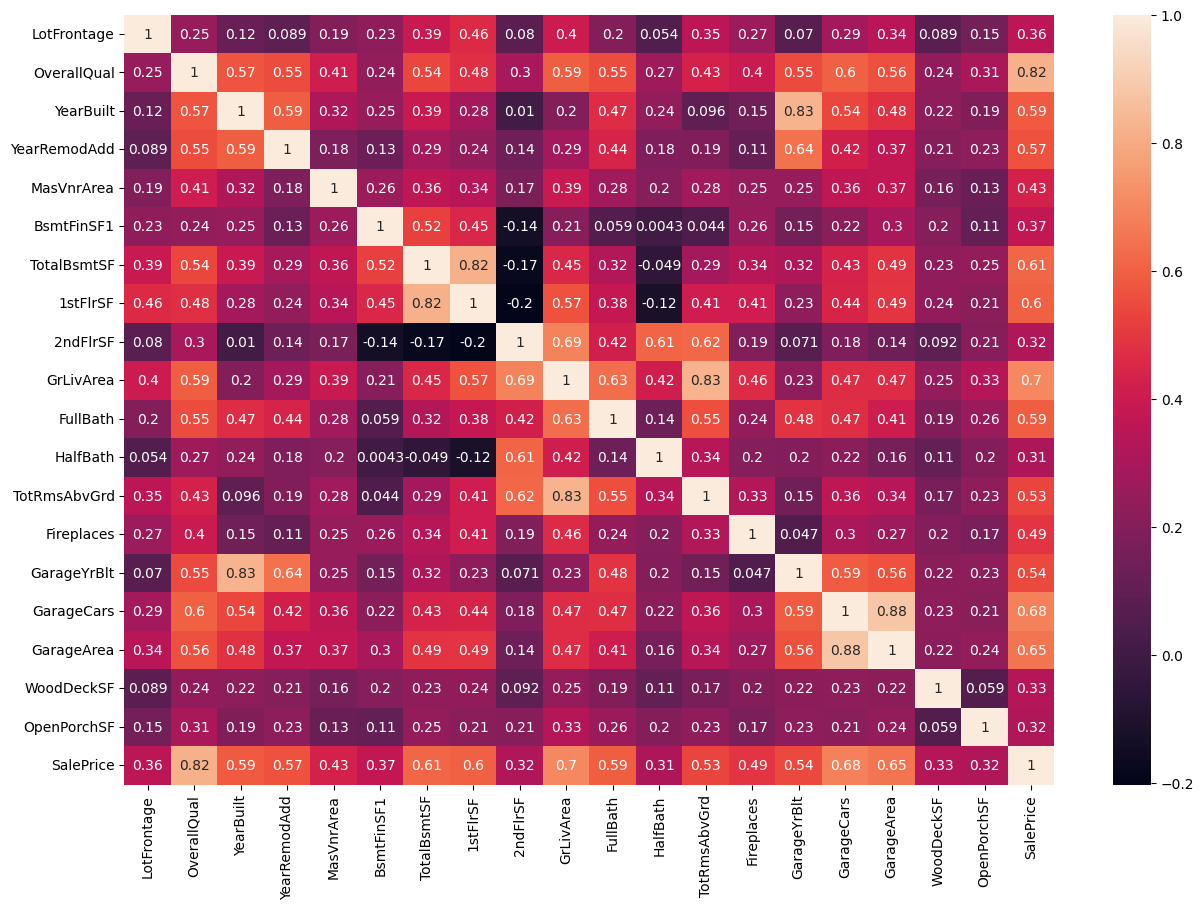

In [389]:
plt.figure(figsize=(15,10))
sns.heatmap(train[cor_most].corr(),annot=True)

## 6. 숫자형, 범주형 나누기

In [390]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,None,None,None,9,2008,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,None,None,None,2,2006,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,None,None,None,12,2008,WD,Normal


In [391]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,7,2003,2003,0.0,706.0,0.0,150.0,856.0,...,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,68.0,11250,7,2001,2002,0.0,486.0,0.0,434.0,920.0,...,2001.0,2.0,608.0,0,42,0,0,0,0,0
3,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,756.0,...,1998.0,3.0,642.0,0,35,272,0,0,0,0
4,84.0,14260,8,2000,2000,0.0,655.0,0.0,490.0,1145.0,...,2000.0,3.0,836.0,192,84,0,0,0,0,0


## 8. Categorical to Numerical data

In [392]:
'''
from sklearn.preprocessing import LabelEncoder
for column in list(df_obj.columns):
    le = LabelEncoder()
    le.fit(list(df[column].values))
    df[column] = le.transform(list(df[column].values))
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nfor column in list(df_obj.columns):\n    le = LabelEncoder()\n    le.fit(list(df[column].values))\n    df[column] = le.transform(list(df[column].values))\n'

## 9. 칼럼들의 Skewness 교정

- boxcox 방법

In [393]:
from scipy.stats import skew

In [394]:
num_col = list(df_num.columns)
skewness = df[num_col].apply(lambda x: skew(x)).sort_values(ascending=False)

- |skewness| > 0.5 부터는 치우쳐져있다는 의미로 볼 수 있으므로

In [395]:
high_skewness = skewness[abs(skewness)>0.5]

In [396]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [397]:
for column in high_skewness.index:
    df[column] = boxcox1p(df[column], boxcox_normmax(df[column]+1, method='mle'))

## 10. feature 추가

In [398]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [399]:
df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                 

df['Total_Bathrooms'] = (df['FullBath'] 
                               + (0.5 * df['HalfBath']) 
                               + df['BsmtFullBath'] 
                               + (0.5 * df['BsmtHalfBath'])
                              )
                               

df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )

In [400]:
df.shape

(2919, 89)

## 11. one-hot encoding (categorical to numerical data)

In [401]:
df_total = pd.get_dummies(df).reset_index(drop=True)
df_total.shape

(2919, 350)

In [402]:
df_total.isna().any().sum()

0

In [403]:
#df_total = df_total.astype('float')

## 12. train과 test data로 다시 분리

In [404]:
X = df_total.iloc[:len(train),:]
y = target
test = df_total.iloc[len(train):, :]
X.shape, y.shape, test.shape

((1460, 350), (1460,), (1459, 350))

# **모델링**

In [405]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=24)

In [406]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1168, 350), (292, 350), (1168,), (292,))

In [407]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
test = pipeline.transform(test)'''

from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X=rbst_scaler.fit_transform(X)
test=rbst_scaler.transform(test)

In [408]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10, shuffle=True, random_state=24)

## 1. Neural Network

In [409]:
'''X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
test = test.astype('float32')'''

"X_train = X_train.astype('float32')\nX_val = X_val.astype('float32')\ntest = test.astype('float32')"

## 2. Linear Regression

In [410]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X, y)

LinearRegression()

In [411]:
lr_pred = lr.predict(test)

In [412]:
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.SalePrice=np.expm1(lr_pred)
submission

/tmp/ipykernel_33/1078198490.py:2: RuntimeWarning: overflow encountered in expm1
  submission.SalePrice=np.expm1(lr_pred)


,Id,SalePrice
0,1461,123713.391800
1,1462,169635.357856
2,1463,190303.309663
3,1464,204377.674027
4,1465,195829.582219
...,...,...
1454,2915,84350.082382
1455,2916,80384.266159
1456,2917,176724.274548
1457,2918,120599.786989


In [413]:
submission.to_csv("LR.csv",index=False)

## 3. Ridge regression

In [414]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [415]:
alpha = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

In [416]:
rg=RidgeCV(alphas=alpha,cv=kfolds, scoring="neg_mean_squared_error")
rg.fit(X,y)

RidgeCV(alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5],
        cv=KFold(n_splits=10, random_state=24, shuffle=True),
        scoring='neg_mean_squared_error')

In [417]:
rg_pred = rg.predict(test)
submission.SalePrice=np.expm1(rg_pred)
submission

,Id,SalePrice
0,1461,117705.847191
1,1462,162111.141797
2,1463,182365.127236
3,1464,199763.566503
4,1465,192860.620870
...,...,...
1454,2915,86733.263980
1455,2916,82061.593276
1456,2917,164146.528564
1457,2918,118863.980981


In [418]:
submission.to_csv("RIDGE.csv",index=False)

## 4. Lasso

In [419]:
alpha = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In [420]:
ls=LassoCV(alphas=alpha,cv=kfolds)
ls.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4862448072112304, tolerance: 0.02029932880917277
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32838232278554, tolerance: 0.02133683555838849
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5860707317650515, tolerance: 0.021195879436891805
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: Conver

LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                0.0008],
        cv=KFold(n_splits=10, random_state=24, shuffle=True))

In [421]:
ls_pred = ls.predict(test)
submission.SalePrice=np.expm1(ls_pred)
submission

,Id,SalePrice
0,1461,118584.214631
1,1462,160045.596832
2,1463,182600.155918
3,1464,201390.798092
4,1465,198219.968429
...,...,...
1454,2915,89487.996158
1455,2916,85156.115270
1456,2917,165555.718231
1457,2918,120271.018972


In [422]:
submission.to_csv("LASSO.csv",index=False)

## 5. Elastic Net

In [423]:
alpha = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [424]:
en=ElasticNetCV(alphas=alpha, l1_ratio=l, cv=kfolds)
en.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026610433500282582, tolerance: 0.02029932880917277
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026705708850055743, tolerance: 0.02029932880917277
  model = cd_fast.enet_coordinate_descent_gram(


ElasticNetCV(alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007],
             cv=KFold(n_splits=10, random_state=24, shuffle=True),
             l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1])

In [425]:
en_pred = en.predict(test)
submission.SalePrice=np.expm1(en_pred)
submission

,Id,SalePrice
0,1461,118584.214631
1,1462,160045.596832
2,1463,182600.155918
3,1464,201390.798092
4,1465,198219.968429
...,...,...
1454,2915,89487.996158
1455,2916,85156.115270
1456,2917,165555.718231
1457,2918,120271.018972


In [426]:
submission.to_csv("ElasticNet.csv",index=False)

## 6. Random Forest Regression

In [427]:
from sklearn.ensemble import RandomForestRegressor

In [428]:
rf= RandomForestRegressor()
rf.fit(X,y)
rf_pred = rf.predict(test)

In [429]:
submission.SalePrice=np.expm1(rf_pred)
submission

,Id,SalePrice
0,1461,125978.276775
1,1462,152109.600561
2,1463,181877.283932
3,1464,181586.901138
4,1465,198131.055737
...,...,...
1454,2915,80572.778450
1455,2916,85438.443579
1456,2917,160572.237095
1457,2918,120081.550601


In [430]:
submission.to_csv("RandomForest.csv",index=False)

## 7.XGBoost with gridSearch

In [431]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [432]:
XGB = XGBRegressor()
xgb_param = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
xgb=GridSearchCV(XGB, param_grid=xgb_param, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=4)
xgb.fit(X,y)
xgb_best = xgb.best_estimator_

xgb.best_score_

-0.015276749182672267

## 8. Gradient Boosting with girdSearch

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [433]:
GB = GradientBoostingRegressor()
gb_param = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gb = GridSearchCV(GB,param_grid=gb_param, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=4)
gb.fit(X,y)
gb_best = gb.best_estimator_

gb.best_score_

NameError: name 'GradientBoostingRegressor' is not defined

## 9. LGB with gridSearch

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
LGB = LGBMRegressor()
lgb_param = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
lgb = GridSearchCV(LGB,param_grid = lgb_param, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=4)
lgb.fit(X,y)
lgb_best = lgb.best_estimator_

lgb.best_score_

## 10. Stacking

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
stack= StackingCVRegressor(regressors=(rg, ls, en, gb_best, xgb_best, lgb_best),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
stack.fit(X, y)

In [ ]:
stack_pred = stack.predict(test)
submission.SalePrice=np.expm1(stack_pred)
submission.to_csv("Stack.csv",index=False)
submission